In [4]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from methods.graph_transformations import indirect_effects_vector
from methods.data_transformations import *

pd.set_option('display.max_columns', None)
%matplotlib inline

# Load datasets

In [5]:
mean_field_sims_paths = '.\\data\\simulations_outputs\\mean_field_vis_sims_actionTrue_dataTrue_2023-03-30.csv'
df_vis = pd.read_csv(mean_field_sims_paths)
model = ['update_schedule', 'factorisation', 'evidence_weight']
df_vis['model'] = df_vis['update_schedule'] + "_" + df_vis['factorisation'] + "_" + df_vis['evidence_weight'].astype(str)
df_vis = add_dampened_tag(df_vis)

lc_discrete_att_sims_paths = '.\\data\\simulations_outputs\\LC_discrete_att_&_att_sims_actionTrue_dataTrue_2023-04-01.csv'
df_lc_att = pd.read_csv(lc_discrete_att_sims_paths)
model = ['evidence_weight']
df_lc_att['model'] = df_lc_att['internal_state'] + "_" + df_lc_att['evidence_weight'].astype(str)
df_lc_att = add_dampened_tag(df_lc_att)

lc_discrete_sims_paths = '.\\data\\simulations_outputs\\LC_discrete_&_1_sims_actionTrue_dataTrue_2023-04-01.csv'
df_lc = pd.read_csv(lc_discrete_sims_paths)
model = ['evidence_weight']
df_lc['model'] = df_lc['internal_state'] + "_" + df_lc['evidence_weight'].astype(str)
df_lc = add_dampened_tag(df_lc)

normative_sims_paths = '.\\data\\simulations_outputs\\normative_&_1_sims_actionTrue_dataTrue_2023-04-02.csv'
df_normative = pd.read_csv(normative_sims_paths)
model = ['evidence_weight']
df_normative['model'] = df_normative['internal_state'] + "_" + df_normative['evidence_weight'].astype(str)
df_normative = add_dampened_tag(df_normative)

df_classic = pd.concat([df_lc_att.drop(['decay_rate'], axis=1), df_lc, df_normative], ignore_index=True)

c:\Utility\Python\python38\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
generic_trials = ['ccause', 'collider', 'confound', 'chain', 'dampened']
df_vis_gen = df_vis[df_vis.trial_name.isin(generic_trials)]
df_classic_gen = df_classic[df_classic.trial_name.isin(generic_trials)]

palette = sns.color_palette("Set2")

models_vis = ['omniscient_normative', 'omniscient_local_computations', 'full_local_computations', 'full_normative', 'single_variable_local_computations', 'single_variable_normative']
models_classic = ['LC_discrete_&_1', 'LC_discrete_att_&_att', 'normative_&_1']
models_all = models_vis + models_classic
palette = sns.color_palette("Set2", n_colors=len(models_all))
def get_colors(xticks, models, palette):
    colors = []
    for i, t in enumerate(xticks):
        for model in models:
            if model in t:
                colors.append(palette[models.index(model)])

    return colors

# Select relevant models for CCN analysis

In [7]:
cols = df_classic.columns

evidence_w = float(1)

df_vis_gen_1 = df_vis_gen[cols][df_vis_gen[cols].evidence_weight == evidence_w]
df_classic_gen_1 = df_classic_gen[df_classic_gen.evidence_weight == evidence_w]
df_ccn_all = pd.concat((df_vis_gen_1,df_classic_gen_1), ignore_index=True)


ccn_models = [
    f'normative_&_1_{evidence_w}',
    f'LC_discrete_&_1_{evidence_w}',
    #f'LC_discrete_att_&_att_{evidence_w}', 
    #f'full_normative_{evidence_w}', 
    #f'full_local_computations_{evidence_w}',
    #f'single_variable_normative_{evidence_w}',
    #f'single_variable_local_computations_{evidence_w}',
    f'omniscient_normative_{evidence_w}', 
    f'omniscient_local_computations_{evidence_w}'
]

ccn_models_names = {
    f'normative_&_1_{evidence_w}': 'Normative',
    f'LC_discrete_&_1_{evidence_w}': 'LC',
    #f'LC_discrete_att_&_att_{evidence_w}':, 
    #f'full_normative_{evidence_w}':, 
    #f'full_local_computations_{evidence_w}':,
    #f'single_variable_normative_{evidence_w}':,
    #f'single_variable_local_computations_{evidence_w}':,
    f'omniscient_normative_{evidence_w}': 'Variational Normative', 
    f'omniscient_local_computations_{evidence_w}': 'Variational LC'
}

ccn_models_labels = [v for v in ccn_models_names.values()]

df_ccn = df_ccn_all[df_ccn_all.model.isin(ccn_models)]

df_ccn['model_labels'] = df_ccn.model.replace(ccn_models_names)

def split_model_hue(model, internal_state):
    if internal_state == 'mean_field_vis':
        model_type = 'Variational'
    else:
        model_type = 'Standard'
    
    if 'local_computations' in model or 'LC' in model:
        model_factorisation = 'LC'
    else:
        model_factorisation = 'Normative'

    return model_type, model_factorisation

df_ccn['model_type'] = df_ccn.apply(lambda x: split_model_hue(x.model, x.internal_state)[0], axis=1).to_list()
df_ccn['model_factorisation'] = df_ccn.apply(lambda x: split_model_hue(x.model, x.internal_state)[1], axis=1).to_list()

C:\Users\vbtes\AppData\Local\Temp/ipykernel_6504/4082762496.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ccn['model_labels'] = df_ccn.model.replace(ccn_models_names)
C:\Users\vbtes\AppData\Local\Temp/ipykernel_6504/4082762496.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ccn['model_type'] = df_ccn.apply(lambda x: split_model_hue(x.model, x.internal_state)[0], axis=1).to_list()
C:\Users\vbtes\AppData\Local\Temp/ipykernel_6504/4082762496.py:54: SettingWithCopyWarning: 
A value is trying t

# Analysis

## Sample size

In [20]:
a = df_ccn.utid.apply(lambda x: x.split('-')[1])
a.unique().size

420

## Accuracy

#### Generic accuracy statistics

In [8]:
print(df_ccn.groupby('model').accuracy.mean())
print(df_ccn.groupby('model').accuracy.std())

model
LC_discrete_&_1_1.0                  0.889707
normative_&_1_1.0                    0.982519
omniscient_local_computations_1.0    0.842640
omniscient_normative_1.0             0.894877
Name: accuracy, dtype: float64
model
LC_discrete_&_1_1.0                  0.068779
normative_&_1_1.0                    0.042723
omniscient_local_computations_1.0    0.089472
omniscient_normative_1.0             0.096403
Name: accuracy, dtype: float64


#### Compare accuracy between models which correctly recovered theta and others (variational models only)

In [9]:
df_ccn['theta_correct'] = df_ccn.apply(lambda x: 1 if x.theta_MAP == x.theta or x.model_type == 'Standard' else 0, axis=1)

C:\Users\vbtes\AppData\Local\Temp/ipykernel_6504/1854963620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ccn['theta_correct'] = df_ccn.apply(lambda x: 1 if x.theta_MAP == x.theta or x.model_type == 'Standard' else 0, axis=1)


Proportion of trials where $\theta$ was recovered for each factorisation

In [10]:
df_ccn_vis = df_ccn[df_ccn.model_type == 'Variational']
df_ccn_vis.groupby(['model_factorisation', 'theta_correct']).size() / df_ccn_vis.groupby(['model_factorisation']).size()

model_factorisation  theta_correct
LC                   0                0.661830
                     1                0.338170
Normative            0                0.478795
                     1                0.521205
dtype: float64

Mean accuracy given that $\theta$ was recovered

In [11]:
df_ccn_vis.groupby(['model_factorisation', 'theta_correct']).accuracy_weighted.mean()

model_factorisation  theta_correct
LC                   0                0.809140
                     1                0.909476
Normative            0                0.833732
                     1                0.952379
Name: accuracy_weighted, dtype: float64

In [12]:
df_ccn_vis.groupby(['model_factorisation', 'theta_correct', 'trial_name']).accuracy_weighted.mean()

model_factorisation  theta_correct  trial_name
LC                   0              ccause        0.840435
                                    chain         0.795637
                                    collider      0.869456
                                    confound      0.866214
                                    dampened      0.753986
                     1              ccause        0.886051
                                    chain         0.867295
                                    collider      0.979297
                                    confound      0.910869
                                    dampened      0.866785
Normative            0              ccause        0.866101
                                    chain         0.810134
                                    collider      0.853720
                                    confound      0.844729
                                    dampened      0.802790
                     1              ccause        0.939046
         

Mean change in accuracy when theta was recovered

In [13]:
df_ccn_vis[df_ccn_vis.theta_correct == 1].groupby(['model_factorisation']).accuracy_weighted.mean() - df_ccn_vis[df_ccn_vis.theta_correct == 0].groupby(['model_factorisation']).accuracy_weighted.mean()

model_factorisation
LC           0.100336
Normative    0.118647
Name: accuracy_weighted, dtype: float64

In [14]:
df_ccn_vis[df_ccn_vis.theta_correct == 1].groupby(['model_factorisation', 'trial_name']).accuracy_weighted.mean() - df_ccn_vis[df_ccn_vis.theta_correct == 0].groupby(['model_factorisation', 'trial_name']).accuracy_weighted.mean()

model_factorisation  trial_name
LC                   ccause        0.045616
                     chain         0.071658
                     collider      0.109841
                     confound      0.044655
                     dampened      0.112799
Normative            ccause        0.072945
                     chain         0.133830
                     collider      0.124025
                     confound      0.096605
                     dampened      0.148552
Name: accuracy_weighted, dtype: float64

## Parameters estimates

Mean $\theta$ map estimate

In [15]:
df_ccn_vis.groupby(['model_factorisation']).theta_MAP.mean()

model_factorisation
LC           0.246317
Normative    0.325558
Name: theta_MAP, dtype: float64

In [17]:
df_ccn_vis.groupby(['model_factorisation']).sigma_MAP.mean()

model_factorisation
LC           2.933036
Normative    2.879464
Name: sigma_MAP, dtype: float64

Mean $\sigma$ map estimate

In [18]:
df_ccn_vis.groupby(['model_factorisation']).sigma_MAP.mean()

model_factorisation
LC           2.933036
Normative    2.879464
Name: sigma_MAP, dtype: float64

In [19]:
df_ccn_vis.theta_MAP.std()

0.21647088822626837

## Indirect errors frequency given $\theta$ recovery

In [270]:
df_ccn_vis.groupby(['model_factorisation', 'theta_correct', 'trial_name']).model_indirect_errors.mean()

model_factorisation  theta_correct  trial_name
LC                   0              ccause        0.000000
                                    chain         0.988235
                                    collider      0.000000
                                    confound      1.000000
                                    dampened      0.993789
                     1              ccause        0.000000
                                    chain         0.970149
                                    collider      0.000000
                                    confound      0.840909
                                    dampened      0.987179
Normative            0              ccause        0.000000
                                    chain         0.820755
                                    collider      0.000000
                                    confound      0.600000
                                    dampened      0.915888
                     1              ccause        0.000000
         

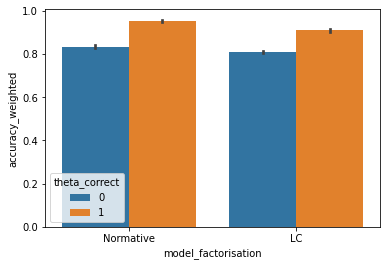

In [21]:
sns.barplot(x='model_factorisation', y='accuracy_weighted', hue='theta_correct', data=df_ccn_vis)

plt.show()

## Model comparisons in accuracy and proximity to participants judgements

In [22]:
df_ccn.groupby(['model_type', 'model_factorisation']).accuracy_weighted.mean()

model_type   model_factorisation
Standard     LC                     0.889772
             Normative              0.982397
Variational  LC                     0.843070
             Normative              0.895572
Name: accuracy_weighted, dtype: float64

In [23]:
df_ccn.groupby(['model_type', 'model_factorisation']).accuracy_weighted.std()

model_type   model_factorisation
Standard     LC                     0.068503
             Normative              0.041725
Variational  LC                     0.088251
             Normative              0.095011
Name: accuracy_weighted, dtype: float64

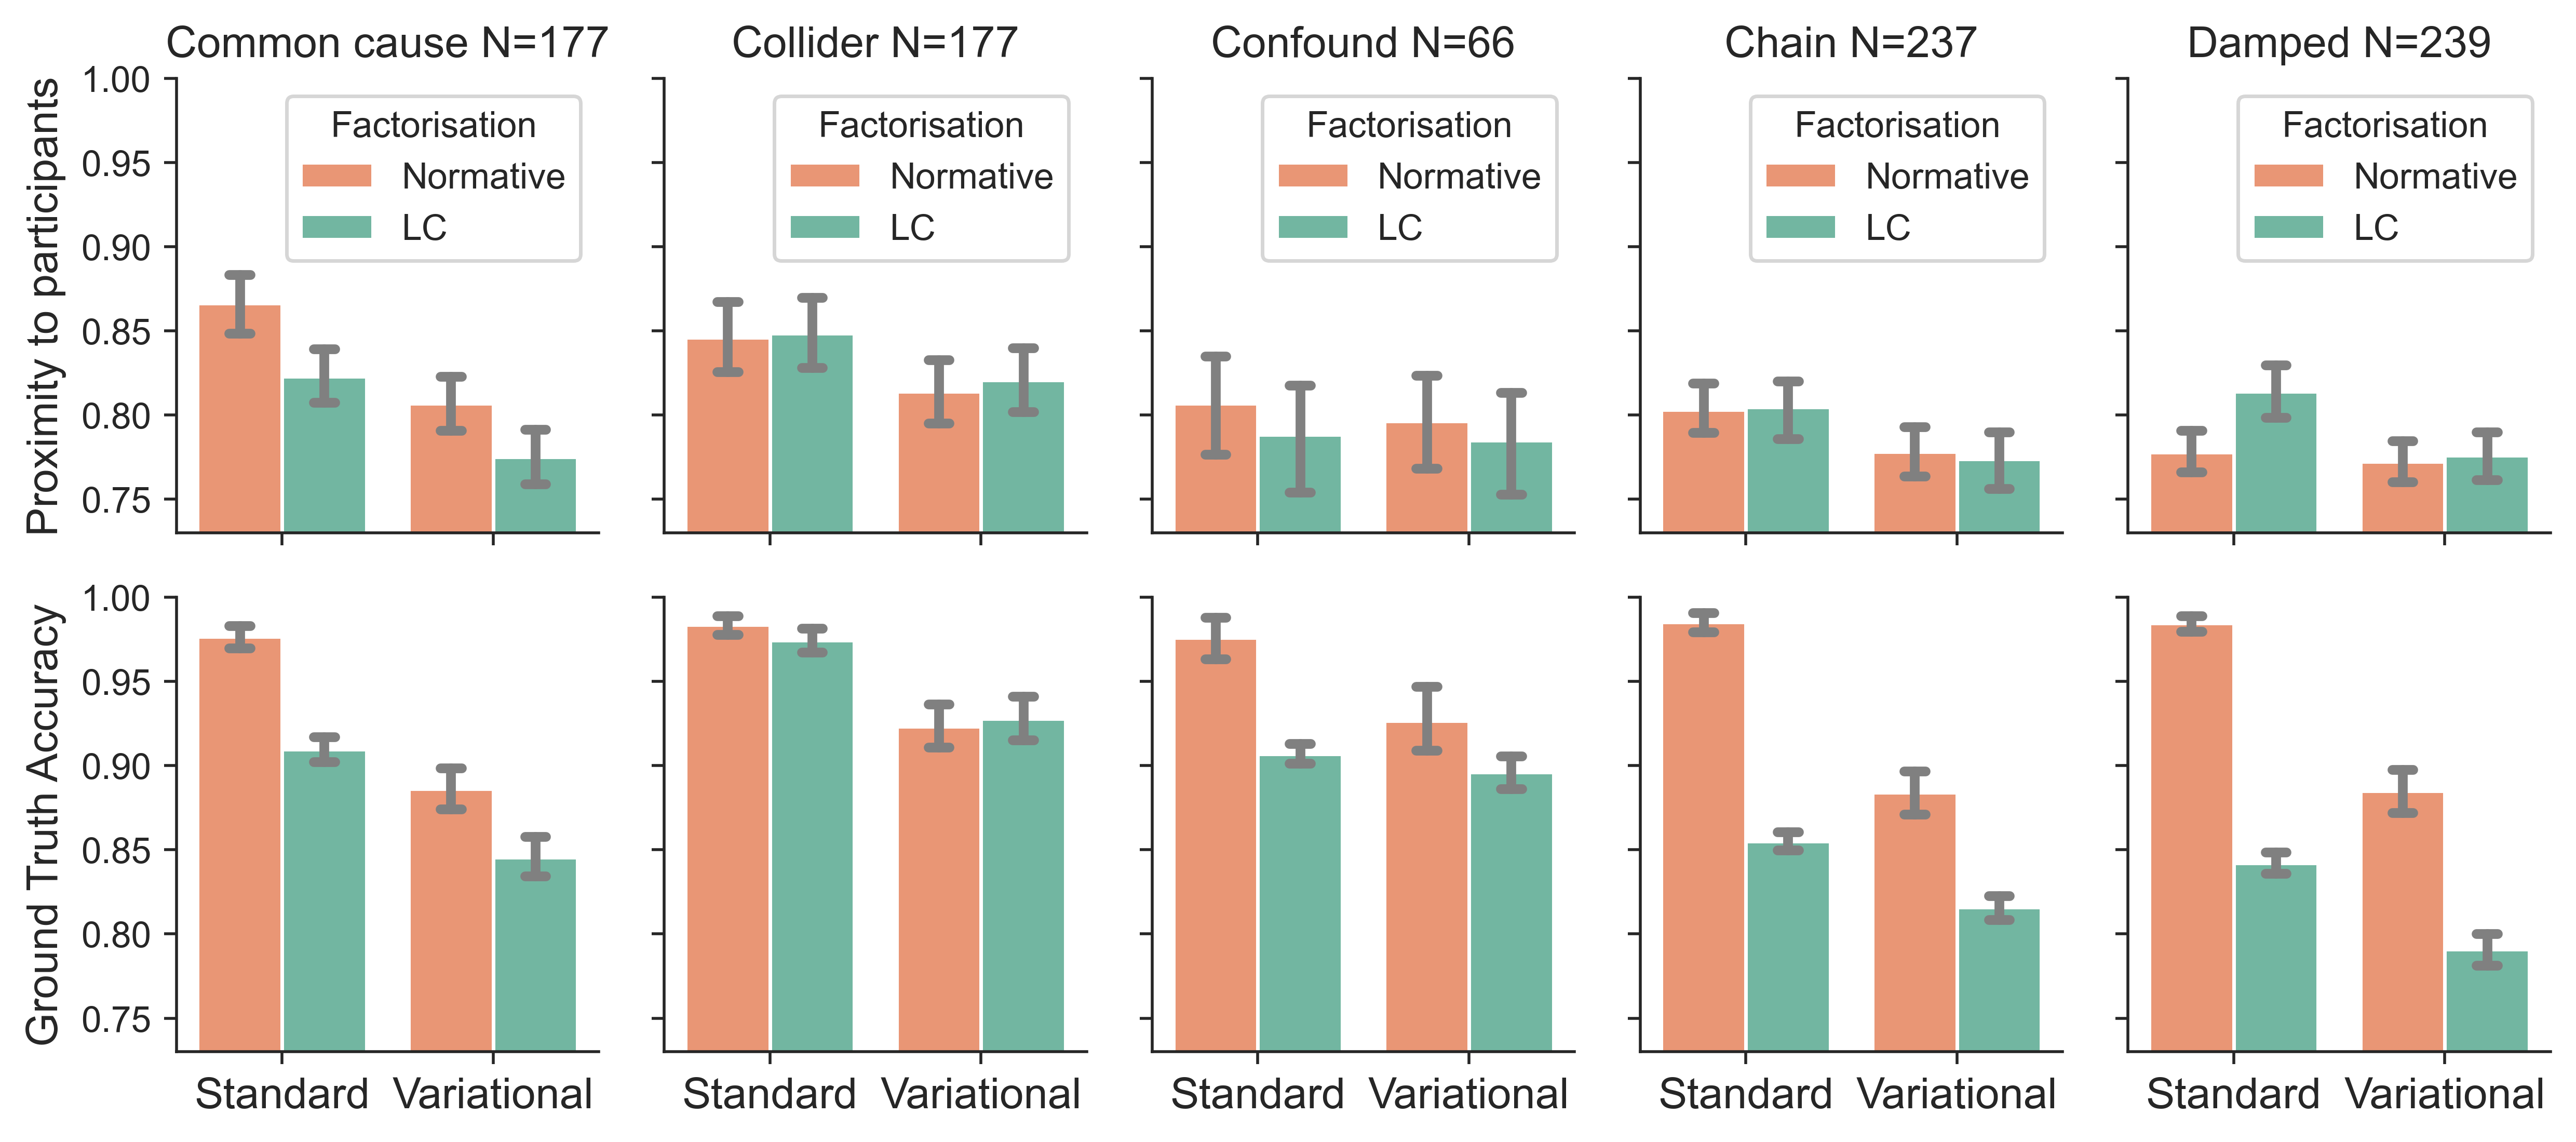

In [56]:
col_features = generic_trials
col_labels = ['Common cause', 'Collider', 'Confound', 'Chain', 'Damped']
col_name = 'trial_name'
row_features = ['judgement_to_weighted_MAP', 'accuracy_weighted']
row_labels = ["Proximity to participants", "Ground Truth Accuracy"]

colors = get_colors(np.sort(df_ccn.model.unique()), ccn_models, palette)
        
sns.set_palette(colors)
fig, axs = plt.subplots(len(row_features), len(col_features), figsize=(10, 4.5), dpi=500, sharey=True, sharex=True)

for i, row in enumerate(row_features):
    for j, col in enumerate(col_features):
        #colors = get_colors(np.sort(df_ccn.model.unique()), ccn_models, palette)
        
        #sns.set_palette(colors)

        df_plot = df_ccn[df_ccn[col_name] == col]
        df_plot = df_plot.rename({'model_factorisation':'Factorisation'}, axis=1)

        sns.barplot(x='model_type', y=row, hue='Factorisation', data=df_plot, ax=axs[i, j], ci=95, capsize=.1, errcolor=".5", order=['Standard', 'Variational'])

        if i < len(row_features) - 1:
            axs[i, j].set_xticklabels([], rotation=90)
            axs[i, j].set_xlabel("", rotation=90)
            axs[i, j].set_title(f'{col_labels[j].capitalize()} N={df_plot[df_plot.model == df_plot.model.unique()[0]].shape[0]}', fontsize=12)
            #axs[i, j].legend(fontsize=11)
        else:
            axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), fontsize=12)
            axs[i, j].legend([], frameon=False)
            axs[i, j].set_xlabel('')
            axs[i, j].set_title('')            

        if j == 0:
            axs[i, j].set_ylabel(row_labels[i], fontsize=12)
        else:
            axs[i, j].set_ylabel("")
        axs[i, j].set_ylim(.73, 1)

        sns.despine(ax=axs[i,j])
        

plt.tight_layout()
plt.savefig('.\\plots\\ccn_accuracy_results.pdf', format='pdf', pad_inches=None)
plt.show()

### Plot graph estimates

#### With standardisation of generic graphs

In [27]:
graph_cols = ['sim_id', 'utid', 'uid', 'experiment', 'sign', 'trial_name', 'judgement', 'ground_truth', 'map_graph_weighted', 'accuracy_weighted', 'model', 'model_labels']
df_graphs_ccn_all = df_ccn[graph_cols]

graph_select = [
    #'collider',
    #'ccause',
    'chain',
    #'confound',
    'dampened'
]

transform_indirect = {
    'chain_neg': np.array([-1, 1, 1, -1, 1, 1]),
    'chain_pos': 1,
    'confound_neg': np.array([-1, 1, 1, -1, 1, 1]),
    'confound_pos': 1,
    'dampened_1': 1,
    'dampened_2': np.array([-1, -1, 1, 1, 1, 1]),
    'dampened_3': np.array([-1, 1, 1, -1, 1, 1])  
}

df_graphs_ccn_std = df_graphs_ccn_all[df_graphs_ccn_all.trial_name.isin(graph_select)]

df_graphs_ccn_std['graph_name'] = df_graphs_ccn_std.apply(lambda x: concat_name(x.sign, x.trial_name), axis=1)



links_cols = ['0->1', '0->2', '1->0', '1->2','2->0', '2->1']
for i, l in enumerate(links_cols):
    df_graphs_ccn_std[l] = df_graphs_ccn_std.apply(lambda x: transform_generic(x.map_graph_weighted, x.ground_truth, x.graph_name, transform_indirect)[i], axis=1).to_list()

judgement_cols = ['j_0->1', 'j_0->2', 'j_1->0', 'j_1->2','j_2->0', 'j_2->1']
for i, l in enumerate(judgement_cols):
    df_graphs_ccn_std[l] = df_graphs_ccn_std.apply(lambda x: transform_generic(x.judgement, x.ground_truth, x.graph_name, transform_indirect)[i], axis=1).to_list()

gt_cols = ['gt_0->1', 'gt_0->2', 'gt_1->0', 'gt_1->2','gt_2->0', 'gt_2->1']
for i, l in enumerate(gt_cols):
    df_graphs_ccn_std[l] = df_graphs_ccn_std.apply(lambda x: transform_generic(x.ground_truth, x.ground_truth, x.graph_name, transform_indirect)[i], axis=1).to_list()




C:\Users\vbtes\AppData\Local\Temp/ipykernel_6504/2679628892.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graphs_ccn_std['graph_name'] = df_graphs_ccn_std.apply(lambda x: concat_name(x.sign, x.trial_name), axis=1)
C:\Users\vbtes\AppData\Local\Temp/ipykernel_6504/2679628892.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graphs_ccn_std[l] = df_graphs_ccn_std.apply(lambda x: transform_generic(x.map_graph_weighted, x.ground_truth, x.graph_name, transform_indirect)[i], axis=1).to_list()
C:\Use

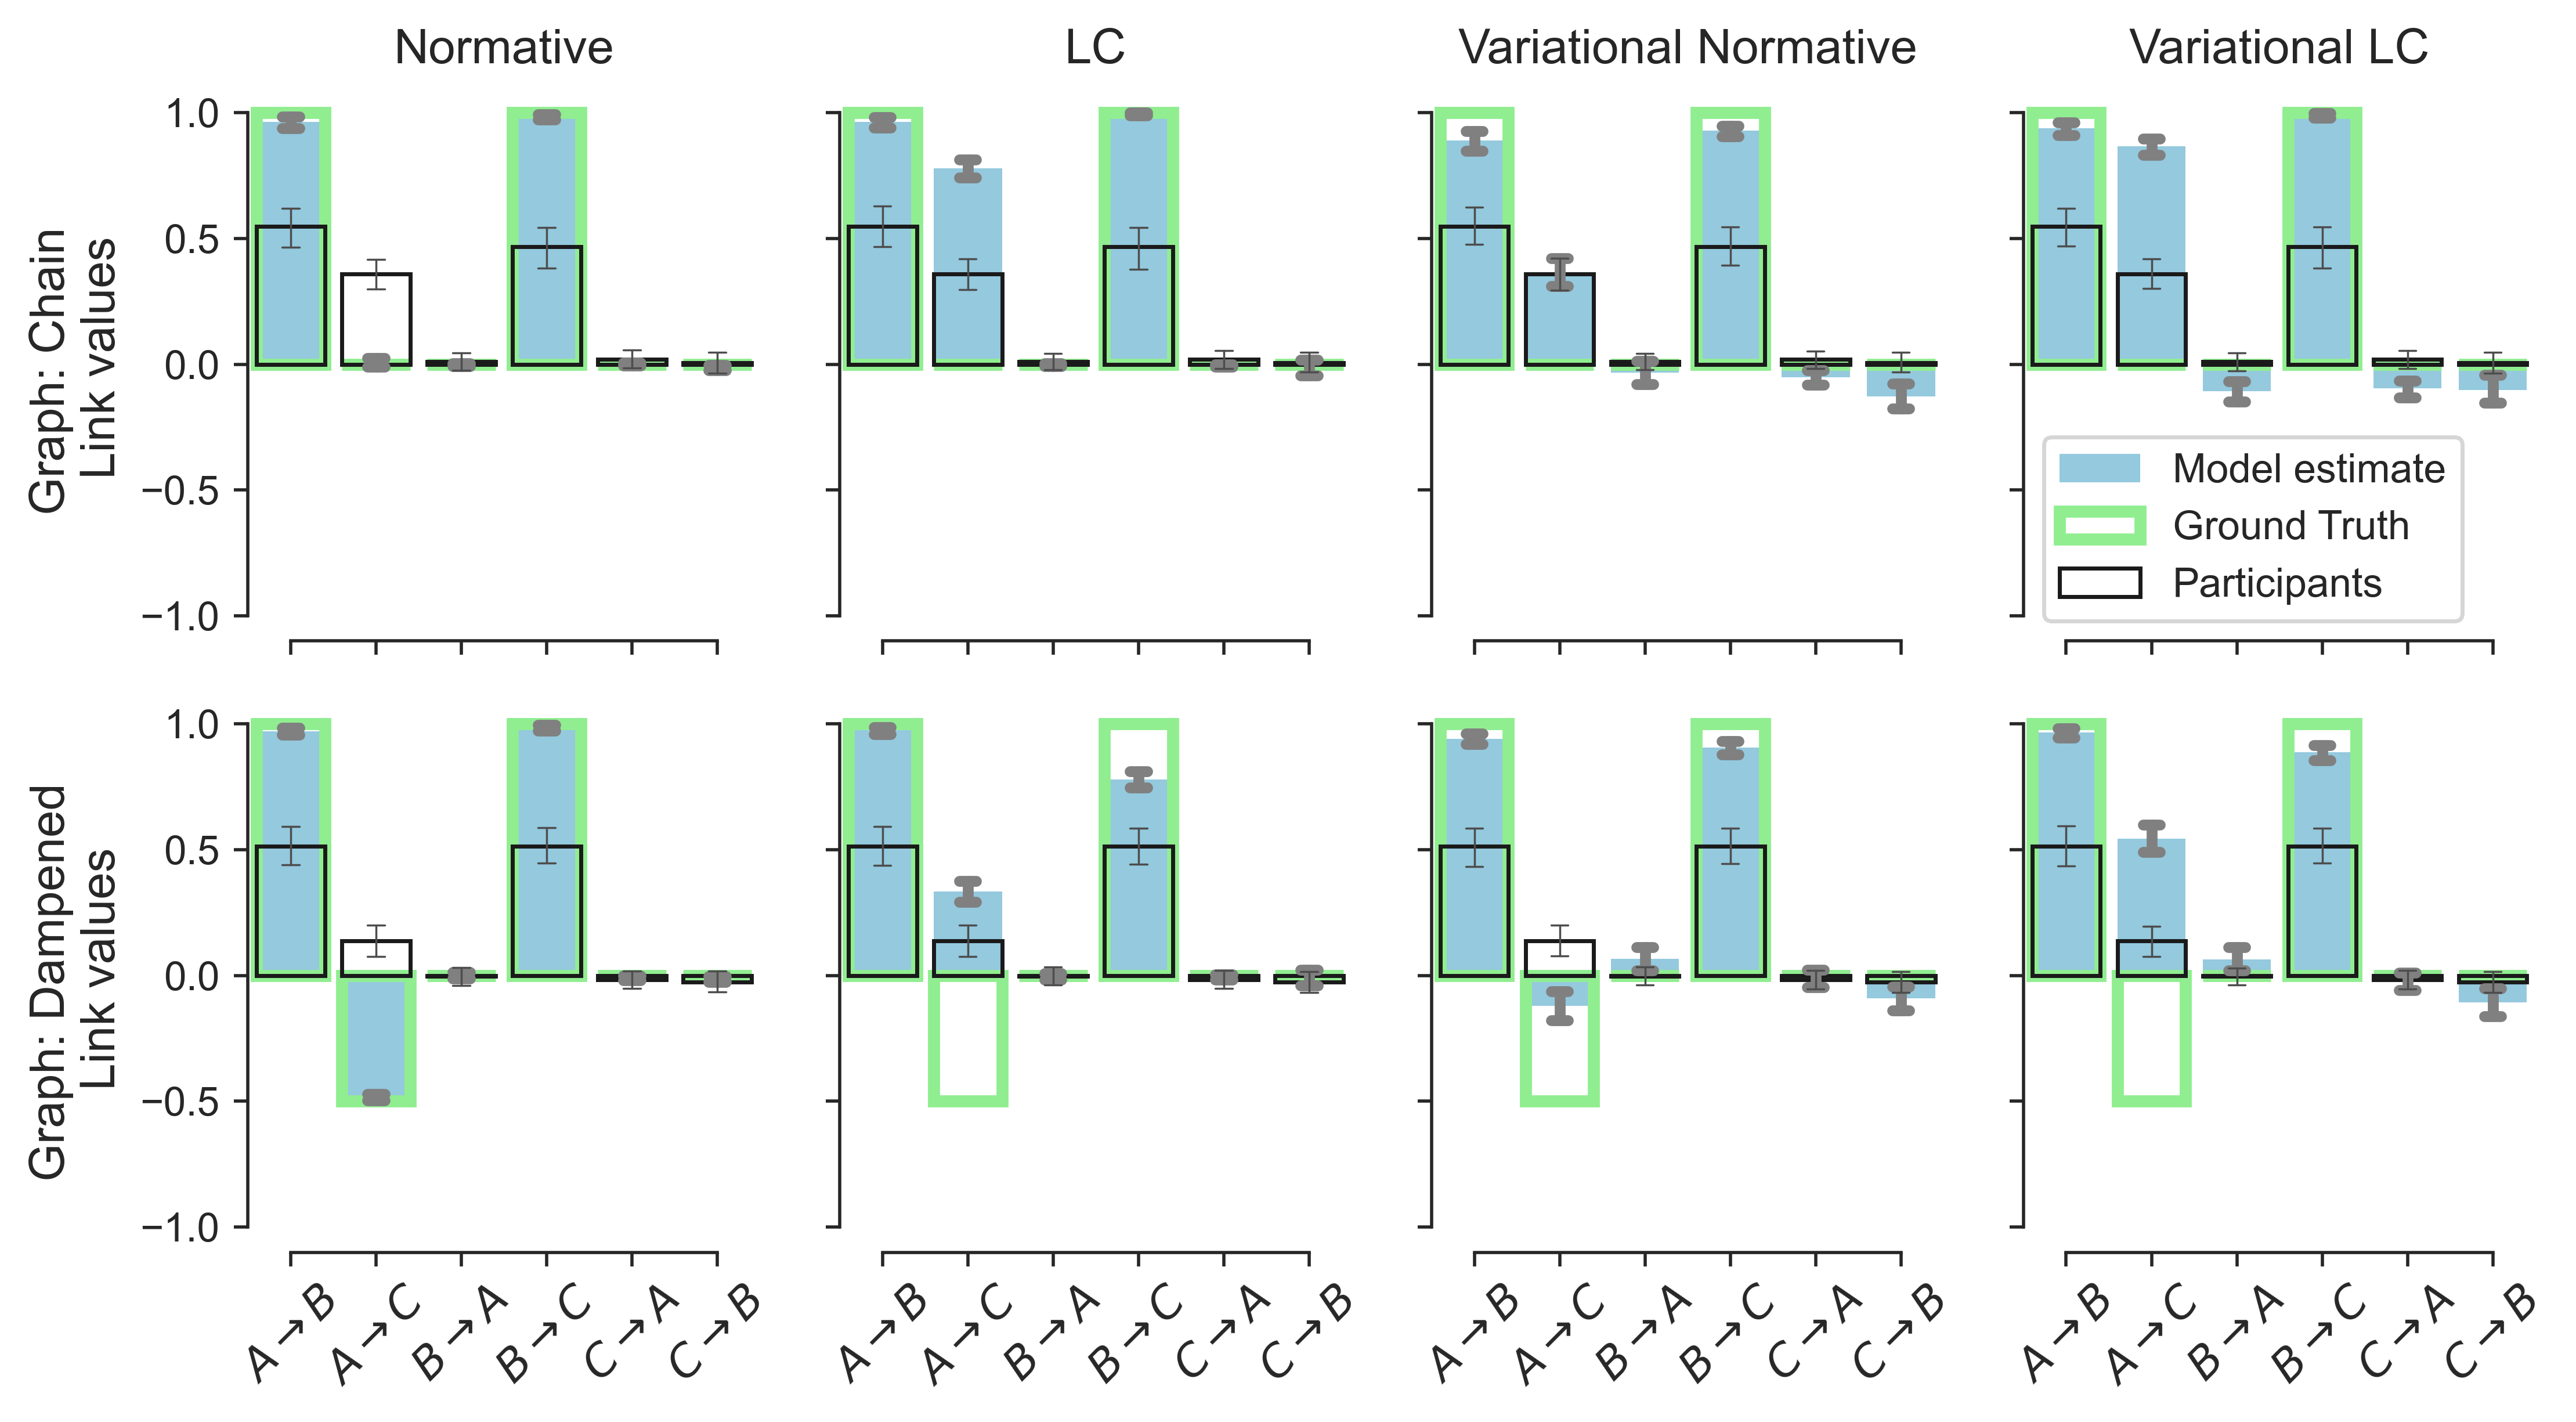

In [51]:
# Plot empirical priors
colors = ('skyblue', 'skyblue', 'lightcoral', 'lightcoral', 'mediumseagreen', 'mediumseagreen')

col_name = 'model_labels'
row_name = 'trial_name'
feature_cols = np.array(ccn_models_labels)#df_graphs_ccn_std[col_name].unique()
feature_rows = np.array(['chain', 'dampened'])#df_graphs_ccn_std[row_name].unique()

xtick_math_labels = [r'$A \rightarrow B$', r'$A \rightarrow C$', r'$B \rightarrow A$', r'$B \rightarrow C$', r'$C \rightarrow A$', r'$C \rightarrow B$']


fig, axs = plt.subplots(feature_rows.size, feature_cols.size, figsize=(9, 5), dpi= 500, facecolor='w', edgecolor='k', sharey=True)

sns.set_style('ticks')
#fig.suptitle(f'Chains', weight='bold')

for i, row in enumerate(feature_rows):
    df_row =  df_graphs_ccn_std[df_graphs_ccn_std[row_name] == row]
    for j, col in enumerate(feature_cols):
        df_plot = df_row[df_row[col_name] == col]

        # PLOT MODEL DATA        
        df_melt = df_plot[links_cols].melt()
        sns.barplot(y=df_melt.value, x=df_melt.variable, data=df_melt,  
                    ci=95, capsize=.2, color='skyblue', linewidth=0, errcolor=".5", ax=axs[i, j], label='Model estimate')
        
        labels = axs[i, j].get_xticklabels()

        df_melt = df_plot[gt_cols].melt()
        sns.barplot(y=df_melt.value, x=df_melt.variable, data=df_melt,  
                    ci=None, capsize=.2, linewidth=3, edgecolor='lightgreen', ax=axs[i, j], facecolor=(0, 0, 0, 0), label='Ground Truth')
        
        df_melt = df_plot[judgement_cols].melt()
        sns.barplot(y=df_melt.value, x=df_melt.variable, data=df_melt,  
                    capsize=.2, linewidth=1, edgecolor='.1', errcolor=".3", errwidth=0.5, ax=axs[i, j], facecolor=(0, 0, 0, 0), label='Participants')
        
        
        if j == 0:
            axs[i, j].set_ylabel(f'Graph: {row.capitalize()} \n Link values', fontsize=12)
        else:
            axs[i, j].set_ylabel('', fontsize=12)

        axs[i, j].set_xlabel('')
        if i == 0:
            axs[i, j].set_title(f'{col}', fontsize=12)
            axs[i, j].set_xticklabels("")
        else:
            axs[i, j].set_title('')
            axs[i, j].set_xticklabels(xtick_math_labels, rotation=45, ha='center', fontsize=11)
        
        axs[i, j].set_ylim(top=1.1, bottom=-1.1)

        if i == 0 and j + 1 == len(feature_cols):
            axs[i, j].legend(fontsize=10)
            
        
        sns.despine(trim=True, ax=axs[i, j])

plt.tight_layout()
plt.savefig('.\\plots\\ccn_graph_estimates.pdf', pad_inches=None)
plt.show()

#### Without standardisation of generic graphs

In [29]:
graph_cols = ['sim_id', 'utid', 'uid', 'experiment', 'sign', 'trial_name', 'judgement', 'ground_truth', 'map_graph_weighted', 'accuracy_weighted', 'model']
df_graphs_ccn_all = df_ccn[graph_cols]

graph_select = [
    #'collider',
    #'ccause',
    'chain',
    #'confound',
    'dampened'
]

df_graphs_ccn = df_graphs_ccn_all[df_graphs_ccn_all.trial_name.isin(graph_select)]

links_cols = ['0->1', '0->2', '1->0', '1->2','2->0', '2->1']

for i, l in enumerate(links_cols):
    df_graphs_ccn[l] = df_graphs_ccn.apply(lambda x: read_array_str(x.map_graph_weighted)[i], axis=1).to_list()

judgement_cols = ['j_0->1', 'j_0->2', 'j_1->0', 'j_1->2','j_2->0', 'j_2->1']

for i, l in enumerate(judgement_cols):
    df_graphs_ccn[l] = df_graphs_ccn.apply(lambda x: read_array_str(x.judgement)[i], axis=1).to_list()

gt_cols = ['gt_0->1', 'gt_0->2', 'gt_1->0', 'gt_1->2','gt_2->0', 'gt_2->1']

for i, l in enumerate(gt_cols):
    df_graphs_ccn[l] = df_graphs_ccn.apply(lambda x: read_array_str(x.ground_truth)[i], axis=1).to_list()

def concat_name(sign, trial_name):
    if sign in ['pos', 'neg', '1', '2', '3']:
        return trial_name + '_' + sign
    else:
        return trial_name
    
df_graphs_ccn['graph_name'] = df_graphs_ccn.apply(lambda x: concat_name(x.sign, x.trial_name), axis=1)

transform_indirect = {
    'chain_neg': np.array([-1, 1, 1, -1, 1, 1]),
    'chain_pos': 1,
    'confound_neg': np.array([-1, 1, 1, -1, 1, 1]),
    'confound_pos': 1,
    'dampened_1': 1,
    'dampened_2': np.array([-1, -1, 1, 1, 1, 1]),
    'dampened_3': np.array([-1, 1, 1, -1, 1, 1])  
}


C:\Users\vbtes\AppData\Local\Temp/ipykernel_6504/115568188.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graphs_ccn[l] = df_graphs_ccn.apply(lambda x: read_array_str(x.map_graph_weighted)[i], axis=1).to_list()
C:\Users\vbtes\AppData\Local\Temp/ipykernel_6504/115568188.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graphs_ccn[l] = df_graphs_ccn.apply(lambda x: read_array_str(x.judgement)[i], axis=1).to_list()
C:\Users\vbtes\AppData\Local\Temp/ipykernel_6504/115568188.py:27: SettingWithCopy

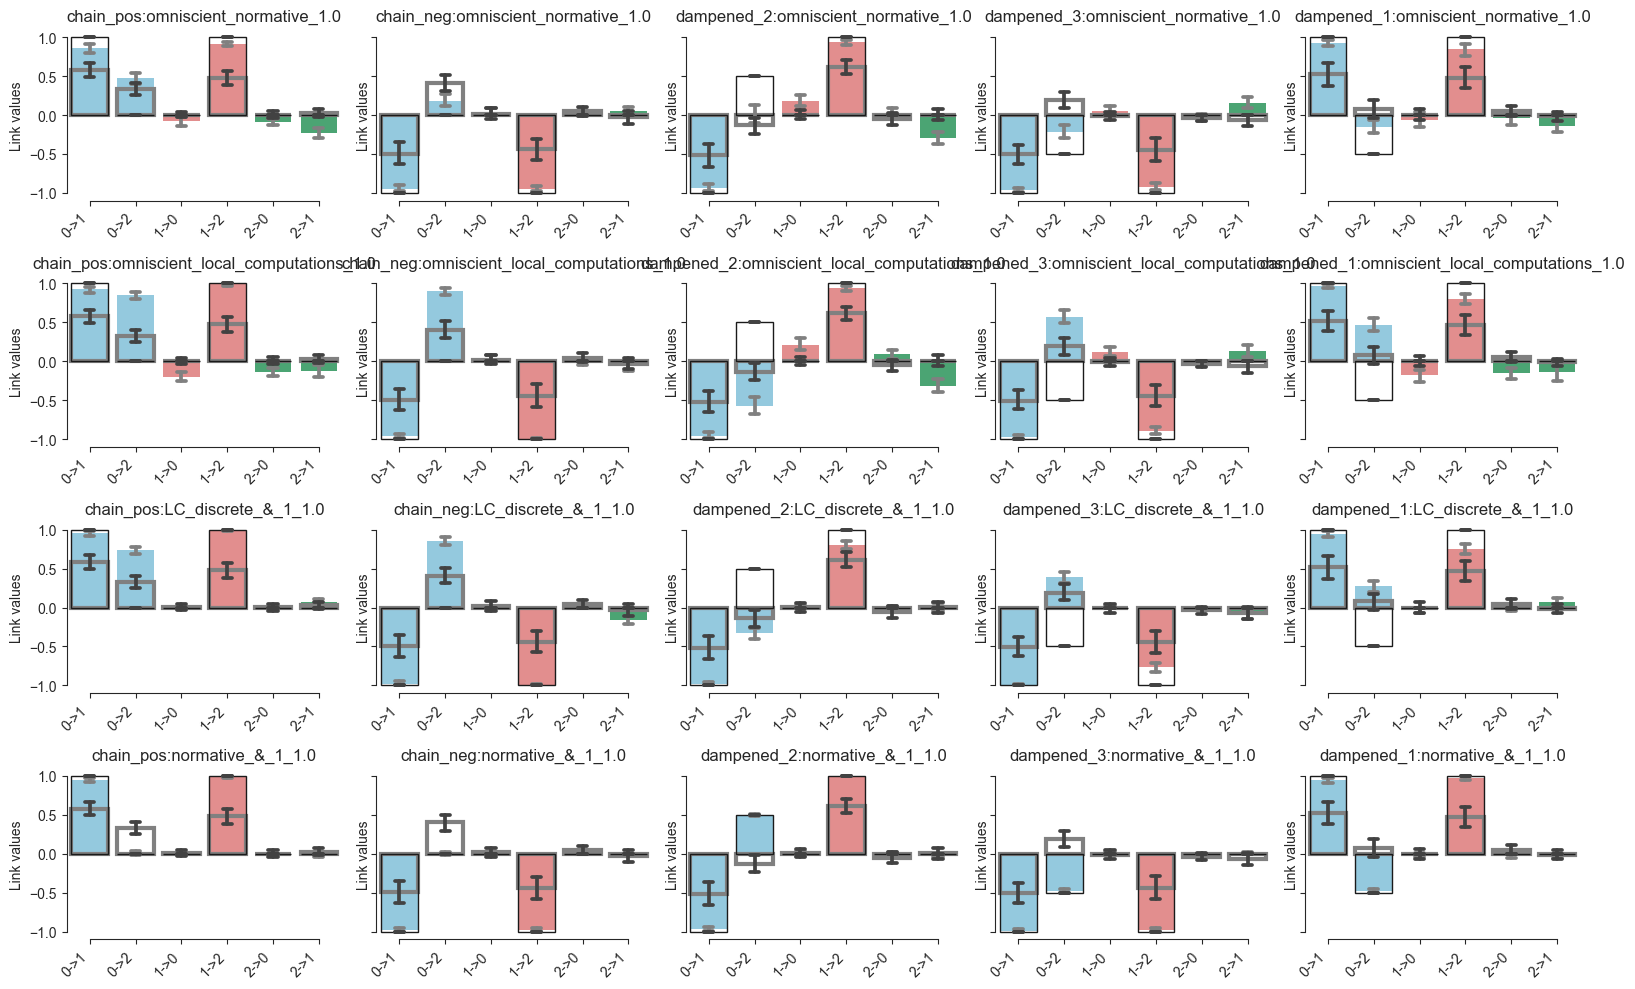

In [30]:
# Plot empirical priors
colors = ('skyblue', 'skyblue', 'lightcoral', 'lightcoral', 'mediumseagreen', 'mediumseagreen')

feature_cols = df_graphs_ccn.graph_name.unique()
col_name = 'graph_name'
feature_row = df_graphs_ccn.model.unique()
row_name = 'model'
fig, axs = plt.subplots(feature_row.size, feature_cols.size, figsize=(16, 10), dpi= 100, facecolor='w', edgecolor='k', sharey=True)

sns.set_style('ticks')
#fig.suptitle(f'Chains', weight='bold')

for i, row in enumerate(feature_row):
    df_row =  df_graphs_ccn[df_graphs_ccn[row_name] == row]
    for j, col in enumerate(feature_cols):
        df_plot = df_row[df_row[col_name] == col]

        # PLOT MODEL DATA        
        df_melt = df_plot[links_cols].melt()
        sns.barplot(y=df_melt.value, x=df_melt.variable, data=df_melt,  
                    ci=95, capsize=.2, palette=colors, linewidth=0, errcolor=".5", ax=axs[i, j])
        
        labels = axs[i, j].get_xticklabels()

        df_melt = df_plot[judgement_cols].melt()
        sns.barplot(y=df_melt.value, x=df_melt.variable, data=df_melt,  
                    capsize=.2, linewidth=3, edgecolor='.5', ax=axs[i, j], facecolor=(0, 0, 0, 0))
        
        df_melt = df_plot[gt_cols].melt()
        sns.barplot(y=df_melt.value, x=df_melt.variable, data=df_melt,  
                    capsize=.2, linewidth=1, edgecolor='.1', ax=axs[i, j], facecolor=(0, 0, 0, 0))
        
        axs[i, j].set(xlabel=None, ylabel='Link values')
        axs[i, j].set_xticklabels(links_cols, rotation=45, ha='right', fontsize=10)
        axs[i, j].set_ylim(top=1.1, bottom=-1.1)
        axs[i, j].set_title(f'{col}:{row}')
        sns.despine(trim=True, ax=axs[i, j])

plt.tight_layout()
plt.show()